In [34]:
import os
import sys

# Move up to the correct project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

print("Updated Python path:", sys.path)  # Debugging check

Updated Python path: ['c:\\Users\\tlfin\\AppData\\Local\\Programs\\Python\\Python311\\python311.zip', 'c:\\Users\\tlfin\\AppData\\Local\\Programs\\Python\\Python311\\DLLs', 'c:\\Users\\tlfin\\AppData\\Local\\Programs\\Python\\Python311\\Lib', 'c:\\Users\\tlfin\\AppData\\Local\\Programs\\Python\\Python311', '', 'C:\\Users\\tlfin\\AppData\\Roaming\\Python\\Python311\\site-packages', 'c:\\Users\\tlfin\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages', 'c:\\Users\\tlfin\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\win32', 'c:\\Users\\tlfin\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\tlfin\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\Pythonwin', 'e:\\Studienarbeit_GitHub\\Studienarbeit', 'e:\\Studienarbeit_GitHub', 'e:\\Studienarbeit_GitHub', 'e:\\Studienarbeit_GitHub', 'e:\\Studienarbeit_GitHub', 'e:\\Studienarbeit_GitHub', 'e:\\Studienarbeit_GitHub\\Studienarbeit', 'e:\\Studienarbeit_G

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

from Strategien.bollinger_strategy import run_bollinger_strategy
from Strategien.momentum import run_momentum_strategy
from Strategien.Moving_Average import run_moving_average_strategy
from Strategien.Buy_and_Hold import run_buy_and_hold_strategy


from RL_Backtest_Agents.DQN_Backtest import run_dqn_backtest_v1, compute_backtest_metrics
#from RL_Backtest_Agents.A2C_Backtest_v1 import run_a2c_backtest_v1
#from RL_Backtest_Agents.A2C_Backtest_v2 import run_a2c_backtest_v2
#from RL_Backtest_Agents.A2C_Backtest_v3 import run_a2c_backtest_v3
#from RL_Backtest_Agents.A2C_Backtest_v4 import run_a2c_backtest_v4
from RL_Backtest_Agents.PPO_Backtest_v1 import run_ppo_backtest_v1
from RL_Backtest_Agents.PPO_Backtest_v2 import run_ppo_backtest_v2
from RL_Backtest_Agents.PPO_Backtest_v3 import run_ppo_backtest_v3
from RL_Backtest_Agents.PPO_Backtest_v4 import run_ppo_backtest_v4

# A2C Agenten vergleichen

In [ ]:
# Strategien ausführen
a2c_result_v1 = run_a2c_backtest_v1()
#a2c_result_v2 = run_a2c_backtest_v2()

In [ ]:
# Portfolios extrahieren
strategies = {
    "A2C Agent_v1": a2c_result_v1["portfolio"],
    #"A2C Agent_v2": a2c_result_v2["portfolio"]
}

plt.figure(figsize=(14, 6))
for name, values in strategies.items():
    plt.plot(values.index, values.values, label=name)
plt.title("Portfolio Value Comparison")
plt.xlabel("Date")
plt.ylabel("Portfolio Value (€)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# PPO Agenten vergleichen

Seed in the environment: 42
Seed in the environment: 42


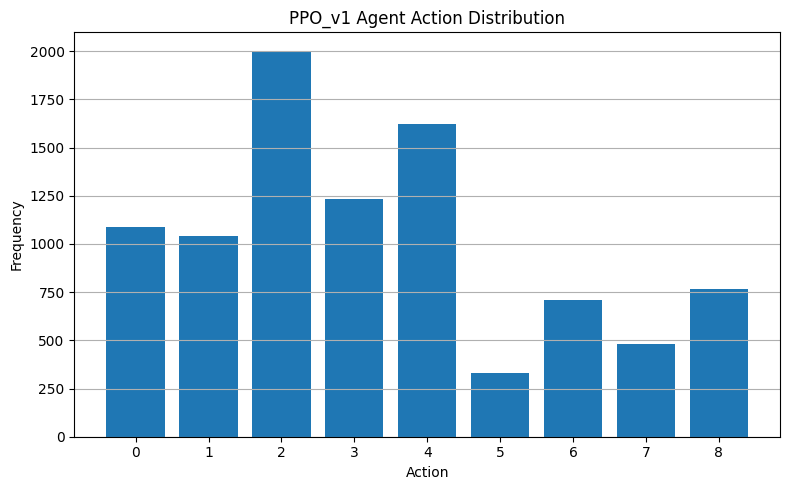

Seed in the environment: 42
Seed in the environment: 42


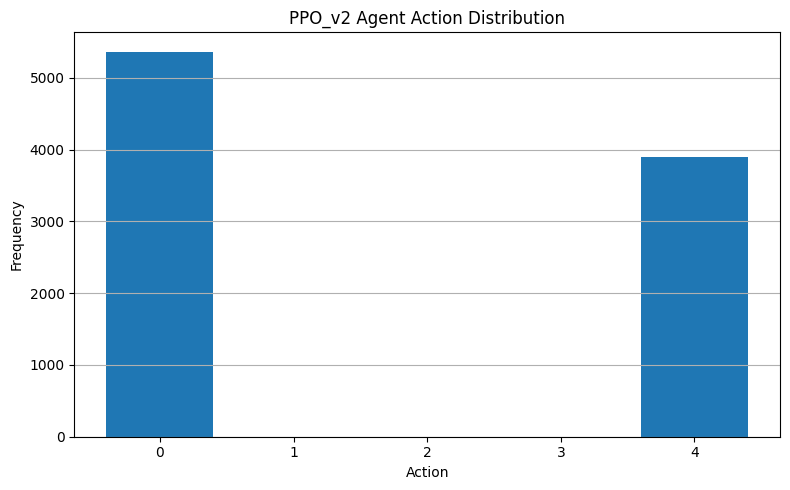

Seed in the environment: 42
Seed in the environment: 42


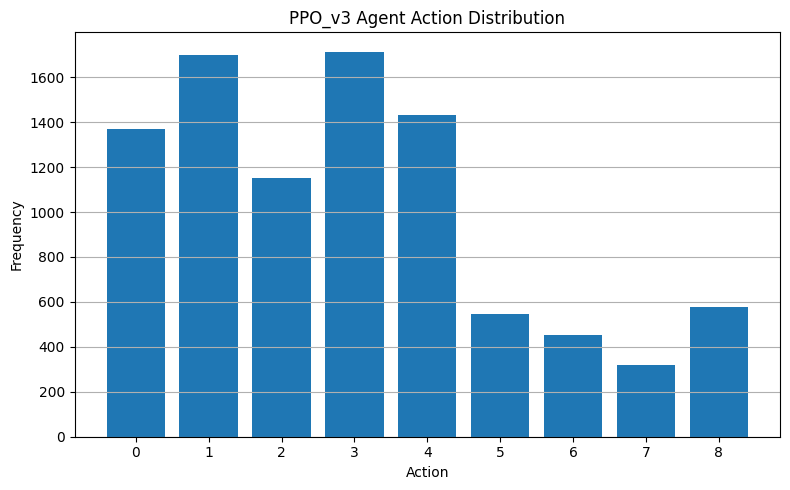

Seed in the environment: 42
Seed in the environment: 42


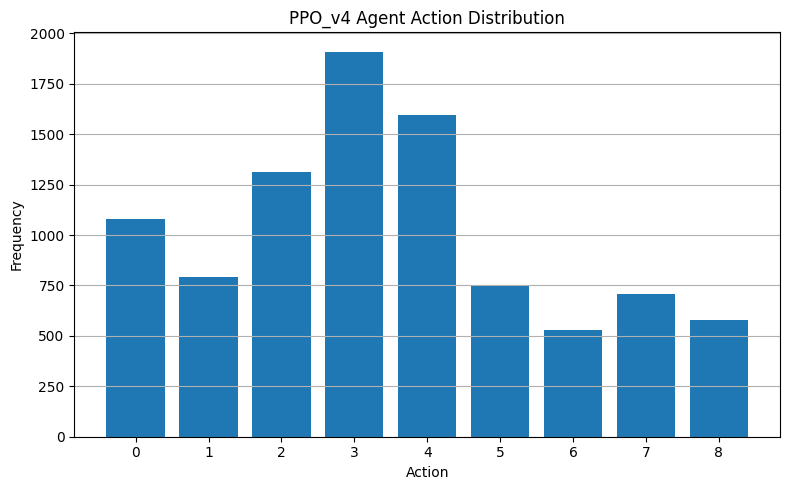

In [36]:
# Strategien ausführen
ppo_result_v1 = run_ppo_backtest_v1()
ppo_result_v2 = run_ppo_backtest_v2()
ppo_result_v3 = run_ppo_backtest_v3()
ppo_result_v4 = run_ppo_backtest_v4()

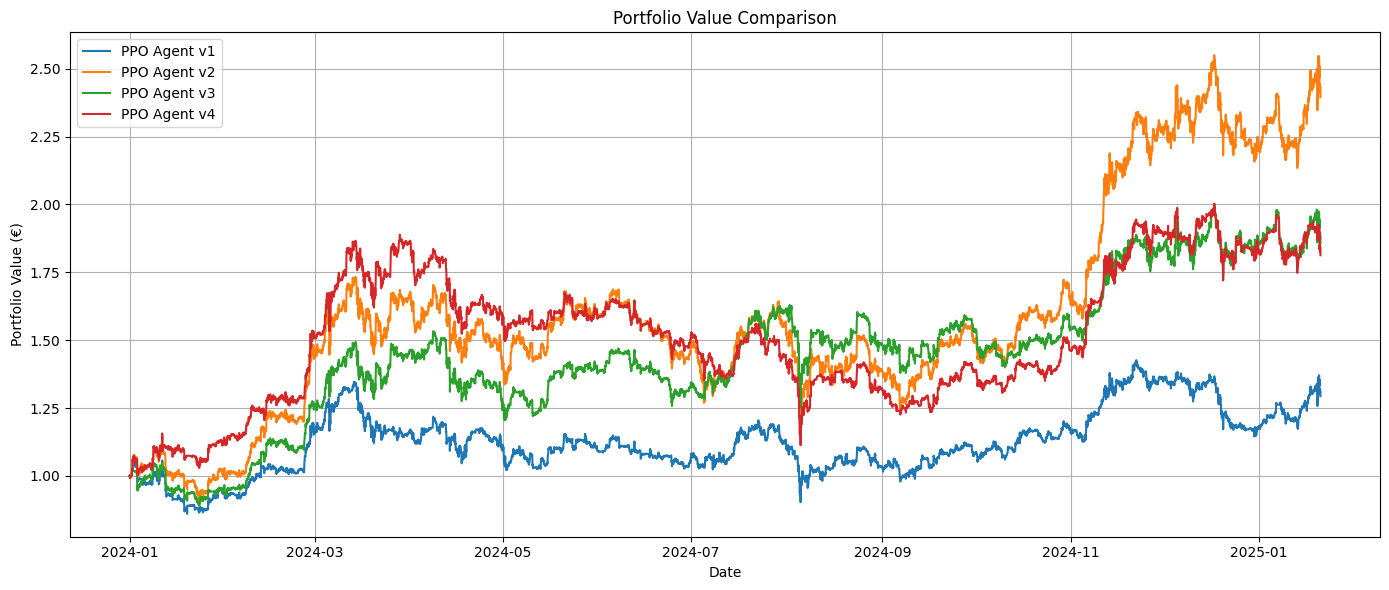

In [37]:
# Portfolios extrahieren
strategies = {
    "PPO Agent v1": ppo_result_v1["portfolio"],
    "PPO Agent v2": ppo_result_v2["portfolio"],
    "PPO Agent v3": ppo_result_v3["portfolio"],
    "PPO Agent v4": ppo_result_v4["portfolio"]
}

plt.figure(figsize=(14, 6))
for name, values in strategies.items():
    plt.plot(values.index, values.values, label=name)
plt.title("Portfolio Value Comparison")
plt.xlabel("Date")
plt.ylabel("Portfolio Value (€)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Strategien ausführen für beste Agenten und Strategien

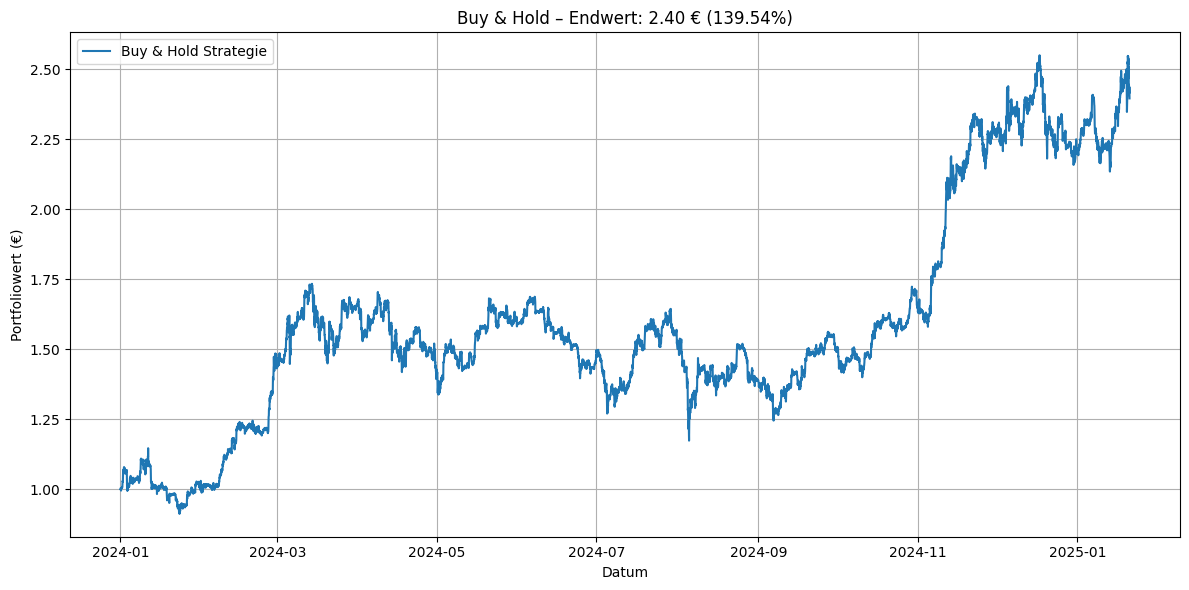

In [ ]:
# Strategien ausführen
ma_result = run_moving_average_strategy()
bollinger_result = run_bollinger_strategy()
momentum_result = run_momentum_strategy()
#dqn_result = run_dqn_backtest()
bh_result = run_buy_and_hold_strategy()

#a2c_result = run_a2c_backtest()
#ppo_result_v1 = run_ppo_backtest_v1()
#ppo_result_v2 = run_ppo_backtest_v2()
#ppo_result_v3 = run_ppo_backtest_v3()
#ppo_result_v4 = run_ppo_backtest_v4()

In [43]:
# Portfolios extrahieren
strategies = {
    #"Moving Average": ma_result["portfolio"],
    #"Bollinger Bands": bollinger_result["portfolio"],
    #"Momentum": momentum_result["portfolio"],
    #"Buy & Hold": bh_result["portfolio"],
    #"DQN Agent": dqn_result["portfolio"],
    #"A2C Agent v1": a2c_result_v1["portfolio"],
    "PPO Agent v1": ppo_result_v1["portfolio"],
    "PPO Agent v2": ppo_result_v2["portfolio"],
    "PPO Agent v3": ppo_result_v3["portfolio"],
    "PPO Agent v4": ppo_result_v4["portfolio"],
}

Portfoliowerte vergleichen 

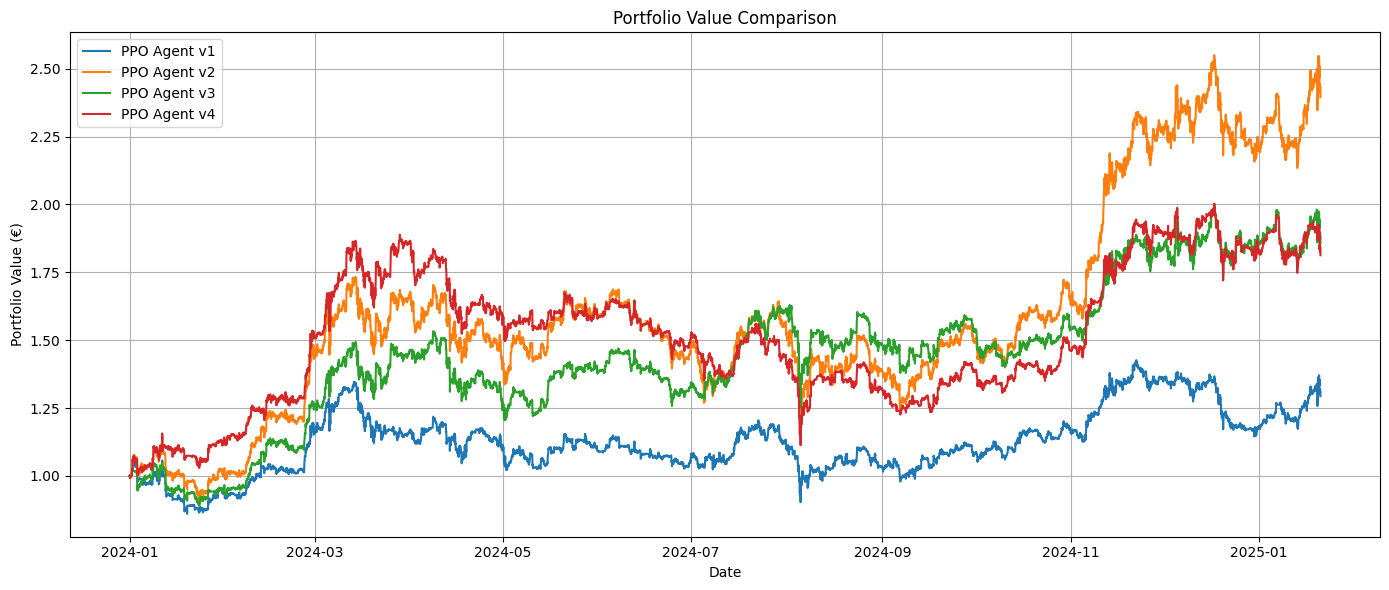

In [44]:
plt.figure(figsize=(14, 6))
for name, values in strategies.items():
    plt.plot(values.index, values.values, label=name)
plt.title("Portfolio Value Comparison")
plt.xlabel("Date")
plt.ylabel("Portfolio Value (€)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Metriken Vergleichen

In [45]:
results = {}
for name, values in strategies.items():
    metrics = compute_backtest_metrics(values)
    results[name] = metrics

pd.DataFrame(results).T.round(4)


,final_portfolio_value,profit,annualized_return,sharpe_ratio,max_drawdown,win_rate,loss_rate
PPO Agent v1,1.2939,0.2939,0.2759,0.7733,-0.3295,0.4418,0.4295
PPO Agent v2,2.3954,1.3954,1.2840,1.8248,-0.3233,0.5123,0.4860
PPO Agent v3,1.8568,0.8568,0.7952,1.5153,-0.2310,0.4621,0.4381
PPO Agent v4,1.8130,0.8130,0.7551,1.5092,-0.4105,0.4568,0.4320
